In [1]:
#library imports
import pandas as pd
import numpy as np
import re
import spacy
import nltk
import string

from tqdm import tqdm
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sb
import matplotlib.pyplot as plt

## Laptop Data

In [2]:
#loading the data
laptop_data = pd.read_csv("./data/original/laptop_quad_test.csv")
laptop_data.head(5)

text  \
0  the unit cost $ 275 to start with , so it is n...   
1  going from acer 15 to acer 11 was difficult , ...   
2  also it ' s not a true ssd drive in there but ...   
3  the computer has difficulty switching between ...   
4  2 / 28 / 18 - a couple days ago i updated the ...   

                                       aspect1  \
0                     1,2 LAPTOP#PRICE 0 12,14   
1             5,7 LAPTOP#DESIGN_FEATURES 0 8,9   
2  7,9 HARD_DISC#OPERATION_PERFORMANCE 0 -1,-1   
3                   1,2 LAPTOP#USABILITY 0 3,4   
4                     13,15 OS#GENERAL 1 -1,-1   

                              aspect2 aspect3 aspect4 aspect5 aspect6 aspect7  
0                                 NaN     NaN     NaN     NaN     NaN     NaN  
1  5,7 LAPTOP#DESIGN_FEATURES 0 14,15     NaN     NaN     NaN     NaN     NaN  
2                                 NaN     NaN     NaN     NaN     NaN     NaN  
3                                 NaN     NaN     NaN     NaN     NaN     NaN  
4                                 NaN     NaN     NaN     NaN     NaN     NaN

In [3]:
def fixStr(text):
    list_temp = []
    if text==text:
        split_1 = text.split(' ')
        
        list_temp.append(split_1[1])
        list_temp.append(split_1[2])

        return list_temp
    return ""

In [4]:
laptop_data['aspect1'] = laptop_data.apply(lambda x: fixStr(x['aspect1']), axis=1)
laptop_data['aspect2'] = laptop_data.apply(lambda x: fixStr(x['aspect2']), axis=1)
laptop_data['aspect3'] = laptop_data.apply(lambda x: fixStr(x['aspect3']), axis=1)
laptop_data['aspect4'] = laptop_data.apply(lambda x: fixStr(x['aspect4']), axis=1)
laptop_data['aspect5'] = laptop_data.apply(lambda x: fixStr(x['aspect5']), axis=1)
laptop_data['aspect6'] = laptop_data.apply(lambda x: fixStr(x['aspect6']), axis=1)
laptop_data['aspect7'] = laptop_data.apply(lambda x: fixStr(x['aspect7']), axis=1)

In [5]:
laptop_data.head()

text  \
0  the unit cost $ 275 to start with , so it is n...   
1  going from acer 15 to acer 11 was difficult , ...   
2  also it ' s not a true ssd drive in there but ...   
3  the computer has difficulty switching between ...   
4  2 / 28 / 18 - a couple days ago i updated the ...   

                                aspect1                      aspect2 aspect3  \
0                     [LAPTOP#PRICE, 0]                                        
1           [LAPTOP#DESIGN_FEATURES, 0]  [LAPTOP#DESIGN_FEATURES, 0]           
2  [HARD_DISC#OPERATION_PERFORMANCE, 0]                                        
3                 [LAPTOP#USABILITY, 0]                                        
4                       [OS#GENERAL, 1]                                        

  aspect4 aspect5 aspect6 aspect7  
0                                  
1                                  
2                                  
3                                  
4

In [6]:
df_laptop = pd.DataFrame()
df_laptop['text'] = laptop_data.text
df_laptop.head()

text
0  the unit cost $ 275 to start with , so it is n...
1  going from acer 15 to acer 11 was difficult , ...
2  also it ' s not a true ssd drive in there but ...
3  the computer has difficulty switching between ...
4  2 / 28 / 18 - a couple days ago i updated the ...

In [7]:
def get_aspects(a1,a2,a3,a4,a5,a6,a7):
    list_term = []
    list_cat = []
    list_pol = []
    if a1 != "":
        split_1 = a1[0].split('#')
        list_term.append(split_1[0])
        list_cat.append(split_1[1])
        list_pol.append(a1[1])
    if a2 != "":
        split_2 = a2[0].split('#')
        list_term.append(split_2[0])
        list_cat.append(split_2[1])
        list_pol.append(a2[1])
    if a3 != "":
        split_3 = a3[0].split('#')
        list_term.append(split_3[0])
        list_cat.append(split_3[1])
        list_pol.append(a3[1])
    if a4 != "":
        split_4 = a4[0].split('#')
        list_term.append(split_4[0])
        list_cat.append(split_4[1])
        list_pol.append(a4[1])
    if a5 != "":
        split_5 = a5[0].split('#')
        list_term.append(split_5[0])
        list_cat.append(split_5[1])
        list_pol.append(a5[1])
    if a6 != "":
        split_6 = a6[0].split('#')
        list_term.append(split_6[0])
        list_cat.append(split_6[1])
        list_pol.append(a6[1])
    if a7 != "":
        split_7 = a7[0].split('#')
        list_term.append(split_7[0])
        list_cat.append(split_7[1])
        list_pol.append(a7[1])
    return pd.Series([list_term,list_cat,list_pol])

In [8]:
df_laptop[["term_true", "cat_true", "pol_true"]] = laptop_data.apply(lambda x: get_aspects(x["aspect1"],
                                                                                           x["aspect2"],
                                                                                           x["aspect3"],
                                                                                           x["aspect4"],
                                                                                           x["aspect5"],
                                                                                           x["aspect6"],
                                                                                           x["aspect7"]), axis=1)

In [9]:
df_laptop

text  \
0    the unit cost $ 275 to start with , so it is n...   
1    going from acer 15 to acer 11 was difficult , ...   
2    also it ' s not a true ssd drive in there but ...   
3    the computer has difficulty switching between ...   
4    2 / 28 / 18 - a couple days ago i updated the ...   
..                                                 ...   
811           it ' s a clean , mean , lean , machine .   
812                      the switch has been awesome .   
813         the backlit keyboard is awesome at night .   
814                  keyboard was a little confusing .   
815  screen display is bright and has excellent gra...   

                    term_true  \
0                    [LAPTOP]   
1            [LAPTOP, LAPTOP]   
2                 [HARD_DISC]   
3                    [LAPTOP]   
4                        [OS]   
..                        ...   
811  [LAPTOP, LAPTOP, LAPTOP]   
812                [HARDWARE]   
813                [KEYBOARD]   
814                [KEYBOARD]   
815       [DISPLAY, GRAPHICS]   

                                              cat_true   pol_true  
0                                              [PRICE]        [0]  
1                   [DESIGN_FEATURES, DESIGN_FEATURES]     [0, 0]  
2                              [OPERATION_PERFORMANCE]        [0]  
3                                          [USABILITY]        [0]  
4                                            [GENERAL]        [1]  
..                                                 ...        ...  
811  [DESIGN_FEATURES, DESIGN_FEATURES, DESIGN_FEAT...  [2, 2, 2]  
812                                          [GENERAL]        [2]  
813                                  [DESIGN_FEATURES]        [2]  
814                                          [GENERAL]        [0]  
815                   [OPERATION_PERFORMANCE, GENERAL]     [2, 2]  

[816 rows x 4 columns]

In [10]:
df_laptop.to_csv("./data/input/laptop_quad_test_input.csv", index=False)

In [11]:
list_term = []
list_pol = []
list_cat = []

def terms_pol(term, cat, pol):
    for i in range(0, len(term)):
        list_term.append(term[i])
        list_cat.append(cat[i])
        list_pol.append(pol[i])
_ = df_laptop.apply(lambda x: terms_pol(x["term_true"], x["cat_true"], x["pol_true"]), axis=1)

In [12]:
df_laptop_2 = pd.DataFrame({'terms': list_term, 'cat': list_cat, 'pol': list_pol})

In [13]:
df_laptop_2

terms                    cat pol
0        LAPTOP                  PRICE   0
1        LAPTOP        DESIGN_FEATURES   0
2        LAPTOP        DESIGN_FEATURES   0
3     HARD_DISC  OPERATION_PERFORMANCE   0
4        LAPTOP              USABILITY   0
...         ...                    ...  ..
1156   HARDWARE                GENERAL   2
1157   KEYBOARD        DESIGN_FEATURES   2
1158   KEYBOARD                GENERAL   0
1159    DISPLAY  OPERATION_PERFORMANCE   2
1160   GRAPHICS                GENERAL   2

[1161 rows x 3 columns]

In [14]:
def change_sentiment_labels(data):
    group = {"0":"negative", "1":"neutral", "2":"positive"}
    data['pol'] = data['pol'].apply(lambda x: group[x])
    return data['pol']
df_laptop_2['pol'] = change_sentiment_labels(df_laptop_2)

In [15]:
df_laptop_2

terms                    cat       pol
0        LAPTOP                  PRICE  negative
1        LAPTOP        DESIGN_FEATURES  negative
2        LAPTOP        DESIGN_FEATURES  negative
3     HARD_DISC  OPERATION_PERFORMANCE  negative
4        LAPTOP              USABILITY  negative
...         ...                    ...       ...
1156   HARDWARE                GENERAL  positive
1157   KEYBOARD        DESIGN_FEATURES  positive
1158   KEYBOARD                GENERAL  negative
1159    DISPLAY  OPERATION_PERFORMANCE  positive
1160   GRAPHICS                GENERAL  positive

[1161 rows x 3 columns]

In [16]:
df_cat = df_laptop_2.groupby(['cat','pol']).size().reset_index(name='counts')
df_terms = df_laptop_2.groupby(['terms','pol']).size().reset_index(name='counts')
df_terms_cat = df_laptop_2.groupby(['cat','terms']).size().reset_index(name='counts')

In [17]:
df_cat

cat       pol  counts
0            CONNECTIVITY  negative       5
1            CONNECTIVITY   neutral       1
2            CONNECTIVITY  positive       2
3         DESIGN_FEATURES  negative      61
4         DESIGN_FEATURES   neutral       6
5         DESIGN_FEATURES  positive     144
6                 GENERAL  negative     131
7                 GENERAL   neutral      45
8                 GENERAL  positive     273
9           MISCELLANEOUS  negative       1
10  OPERATION_PERFORMANCE  negative     114
11  OPERATION_PERFORMANCE   neutral       6
12  OPERATION_PERFORMANCE  positive     192
13            PORTABILITY  negative       2
14            PORTABILITY  positive      11
15                  PRICE  negative       7
16                  PRICE   neutral       1
17                  PRICE  positive      32
18                QUALITY  negative      50
19                QUALITY   neutral       2
20                QUALITY  positive      38
21              USABILITY  negative       9
22              USABILITY   neutral       4
23              USABILITY  positive      24

In [18]:
df_laptop_2.cat.value_counts()

GENERAL                  449
OPERATION_PERFORMANCE    312
DESIGN_FEATURES          211
QUALITY                   90
PRICE                     40
USABILITY                 37
PORTABILITY               13
CONNECTIVITY               8
MISCELLANEOUS              1
Name: cat, dtype: int64

In [19]:
df_laptop_2.terms.value_counts()

LAPTOP                570
DISPLAY               106
KEYBOARD              105
BATTERY                56
OS                     45
SOFTWARE               40
HARDWARE               39
SUPPORT                37
MULTIMEDIA_DEVICES     37
PORTS                  27
COMPANY                17
HARD_DISC              16
CPU                    15
POWER_SUPPLY           12
GRAPHICS                9
MEMORY                  8
SHIPPING                7
FANS&COOLING            6
WARRANTY                4
OPTICAL_DRIVES          2
MOTHERBOARD             1
MOUSE                   1
Out_Of_Scope            1
Name: terms, dtype: int64

In [20]:
df_terms

terms       pol  counts
0              BATTERY  negative      16
1              BATTERY   neutral       5
2              BATTERY  positive      35
3              COMPANY  negative      12
4              COMPANY  positive       5
5                  CPU  negative       1
6                  CPU   neutral       2
7                  CPU  positive      12
8              DISPLAY  negative      26
9              DISPLAY   neutral       5
10             DISPLAY  positive      75
11        FANS&COOLING  negative       3
12        FANS&COOLING   neutral       1
13        FANS&COOLING  positive       2
14            GRAPHICS  negative       2
15            GRAPHICS   neutral       1
16            GRAPHICS  positive       6
17            HARDWARE  negative      24
18            HARDWARE   neutral       3
19            HARDWARE  positive      12
20           HARD_DISC  negative      10
21           HARD_DISC   neutral       1
22           HARD_DISC  positive       5
23            KEYBOARD  negative      50
24            KEYBOARD   neutral       3
25            KEYBOARD  positive      52
26              LAPTOP  negative     132
27              LAPTOP   neutral      26
28              LAPTOP  positive     412
29              MEMORY  positive       8
30         MOTHERBOARD  negative       1
31               MOUSE  positive       1
32  MULTIMEDIA_DEVICES  negative      20
33  MULTIMEDIA_DEVICES   neutral       4
34  MULTIMEDIA_DEVICES  positive      13
35      OPTICAL_DRIVES   neutral       1
36      OPTICAL_DRIVES  positive       1
37                  OS  negative      15
38                  OS   neutral       4
39                  OS  positive      26
40        Out_Of_Scope  positive       1
41               PORTS  negative      12
42               PORTS   neutral       1
43               PORTS  positive      14
44        POWER_SUPPLY  negative       9
45        POWER_SUPPLY  positive       3
46            SHIPPING  negative       2
47            SHIPPING  positive       5
48            SOFTWARE  negative      17
49            SOFTWARE   neutral       1
50            SOFTWARE  positive      22
51             SUPPORT  negative      26
52             SUPPORT   neutral       5
53             SUPPORT  positive       6
54            WARRANTY  negative       2
55            WARRANTY   neutral       2

In [21]:
df_terms_cat

cat     terms  counts
0      CONNECTIVITY    LAPTOP       7
1      CONNECTIVITY     PORTS       1
2   DESIGN_FEATURES   BATTERY       2
3   DESIGN_FEATURES   DISPLAY      31
4   DESIGN_FEATURES  GRAPHICS       1
..              ...       ...     ...
76        USABILITY    MEMORY       2
77        USABILITY     MOUSE       1
78        USABILITY        OS       3
79        USABILITY     PORTS       1
80        USABILITY  SOFTWARE       4

[81 rows x 3 columns]

In [22]:
df_terms_cat.sort_values(by=['counts'],ascending=False)

cat         terms  counts
25                GENERAL        LAPTOP     243
46  OPERATION_PERFORMANCE        LAPTOP     119
8         DESIGN_FEATURES        LAPTOP     103
7         DESIGN_FEATURES      KEYBOARD      42
56                  PRICE        LAPTOP      40
..                    ...           ...     ...
4         DESIGN_FEATURES      GRAPHICS       1
12        DESIGN_FEATURES  Out_Of_Scope       1
77              USABILITY         MOUSE       1
37          MISCELLANEOUS      KEYBOARD       1
79              USABILITY         PORTS       1

[81 rows x 3 columns]

In [23]:
df_terms_cat.groupby(["cat", "terms"])["counts"].count()

cat              terms   
CONNECTIVITY     LAPTOP      1
                 PORTS       1
DESIGN_FEATURES  BATTERY     1
                 DISPLAY     1
                 GRAPHICS    1
                            ..
USABILITY        MEMORY      1
                 MOUSE       1
                 OS          1
                 PORTS       1
                 SOFTWARE    1
Name: counts, Length: 81, dtype: int64

### Analyse Data

#### Polarity

In [20]:
pd.DataFrame(pd.value_counts(df_laptop_2.pol))

pol
positive  716
negative  380
neutral    65

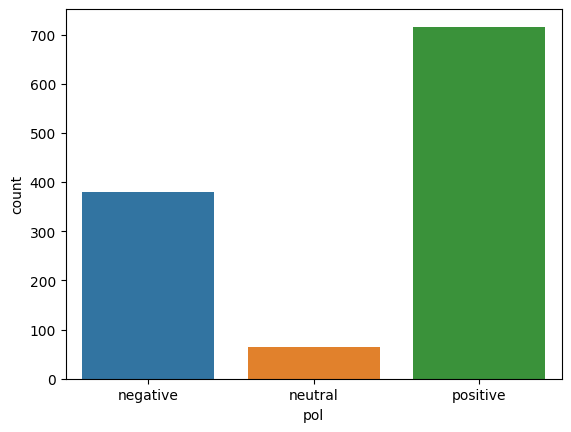

negative    0.327304
neutral     0.055986
positive    0.616710
Name: pol, dtype: float64


In [21]:
percent = df_laptop_2['pol'].value_counts(normalize=True).sort_index()
sb.countplot(x=df_laptop_2['pol'], data = df_laptop_2)
plt.show()
print(percent)

In [22]:
fig1 = go.Figure(data=[go.Pie(labels=df_cat.pol, values=df_cat.counts, hole=.3, title='Polarity Count')])
fig1.show()

#### Category

In [23]:
pd.DataFrame(pd.value_counts(df_laptop_2.cat))

cat
GENERAL                449
OPERATION_PERFORMANCE  312
DESIGN_FEATURES        211
QUALITY                 90
PRICE                   40
USABILITY               37
PORTABILITY             13
CONNECTIVITY             8
MISCELLANEOUS            1

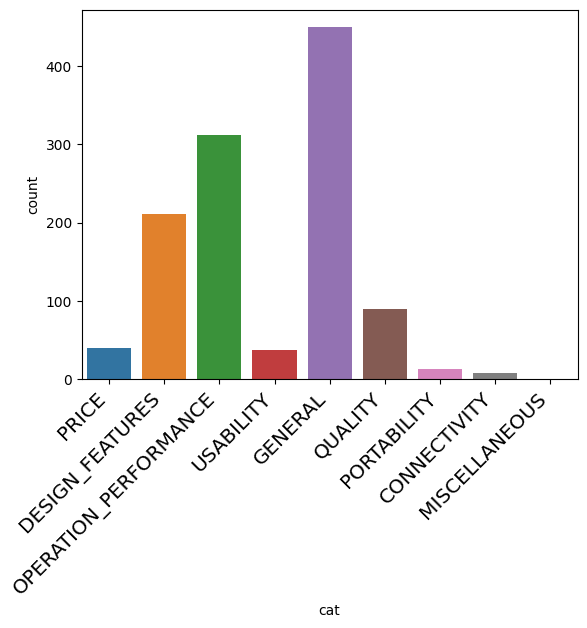

CONNECTIVITY             0.006891
DESIGN_FEATURES          0.181740
GENERAL                  0.386736
MISCELLANEOUS            0.000861
OPERATION_PERFORMANCE    0.268734
PORTABILITY              0.011197
PRICE                    0.034453
QUALITY                  0.077519
USABILITY                0.031869
Name: cat, dtype: float64


In [24]:
percent = df_laptop_2['cat'].value_counts(normalize=True).sort_index()
sb.countplot(x=df_laptop_2['cat'], data = df_laptop_2)
plt.xticks(rotation=45, 
           horizontalalignment='right',
           fontweight='light',
           fontsize='x-large')
plt.show()
print(percent)

In [24]:
fig = px.pie(df_cat, values='counts', names='cat', title='Categories Count')
fig.show()

In [27]:
df_cat.loc[df_cat['counts'] < 20, 'cat'] = 'Others' # Represent less frequently observerd terms
fig = px.pie(df_cat, values='counts', names='cat', title='Categories Count')
fig.show()

In [26]:
fig = px.bar(
    df_cat,
    x="cat",
    y="counts",
    color="pol",
    barmode="stack",
    color_discrete_map={
        "positive": "#52AC5E",
        "negative": "#e34a2d",
        "neutral": "gray",
    },
    title="Categories vs Polarity",
    template="plotly_white",
)

fig.show()

In [27]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_cat.loc[df_cat['pol']=="positive",'cat'], 
                     values=df_cat.loc[df_cat['pol']=="positive",'counts'], 
                      name="pos"), 1, 1) #scalegroup='on',
fig.add_trace(go.Pie(labels=df_cat.loc[df_cat['pol']=="neutral",'cat'], 
                     values=df_cat.loc[df_cat['pol']=="neutral",'counts'], 
                     name="neu"), 2, 1) #scalegroup='on',
fig.add_trace(go.Pie(labels=df_cat.loc[df_cat['pol']=="negative",'cat'], 
                     values=df_cat.loc[df_cat['pol']=="negative",'counts'], 
                     name="neg"), 1, 2) #scalegroup='on'
fig.add_trace(go.Pie(labels=df_cat['pol'], 
                     values=df_cat['counts'], 
                     name="pol"), 2, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.3, hoverinfo="label+percent+name")


fig.show()

In [28]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(["GENERAL"])

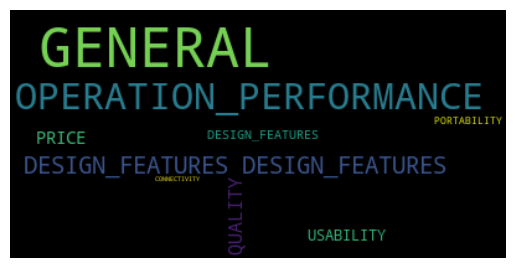

In [29]:
# Start with one review:
text = " ".join(category for category in df_laptop_2.loc[df_laptop_2['pol']=="positive","cat"])

# Create and generate a word cloud image:
# wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
wordcloud = WordCloud(max_words=100).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

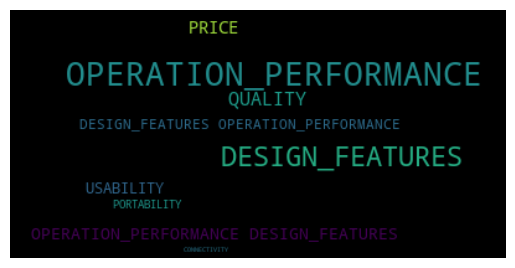

In [30]:
# Start with one review:
text = " ".join(category for category in df_laptop_2.loc[df_laptop_2['pol']=="positive","cat"])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

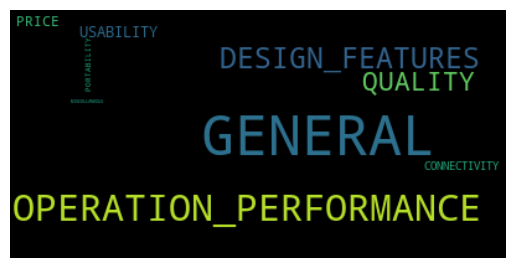

In [31]:
# Start with one review:
text = " ".join(category for category in df_laptop_2.loc[df_laptop_2['pol']=="negative","cat"])

# Create and generate a word cloud image:
# wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
wordcloud = WordCloud(max_words=100).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

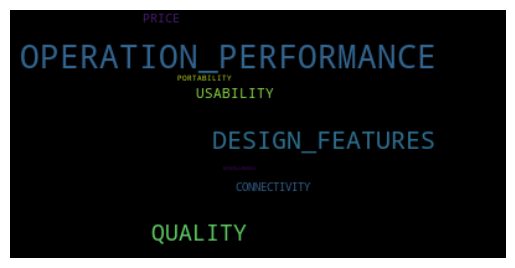

In [32]:
# Start with one review:
text = " ".join(category for category in df_laptop_2.loc[df_laptop_2['pol']=="negative","cat"])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

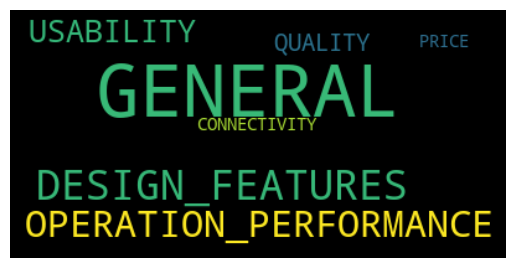

In [33]:
# Start with one review:
text = " ".join(category for category in df_laptop_2.loc[df_laptop_2['pol']=="neutral", "cat"])

# Create and generate a word cloud image:
# wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
wordcloud = WordCloud(max_words=100).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

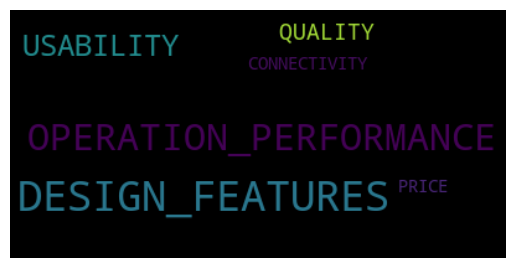

In [34]:
# Start with one review:
text = " ".join(category for category in df_laptop_2.loc[df_laptop_2['pol']=="neutral", "cat"])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Terms

In [35]:
pd.DataFrame(pd.value_counts(df_laptop_2.terms))

terms
LAPTOP                570
DISPLAY               106
KEYBOARD              105
BATTERY                56
OS                     45
SOFTWARE               40
HARDWARE               39
SUPPORT                37
MULTIMEDIA_DEVICES     37
PORTS                  27
COMPANY                17
HARD_DISC              16
CPU                    15
POWER_SUPPLY           12
GRAPHICS                9
MEMORY                  8
SHIPPING                7
FANS&COOLING            6
WARRANTY                4
OPTICAL_DRIVES          2
MOTHERBOARD             1
MOUSE                   1
Out_Of_Scope            1

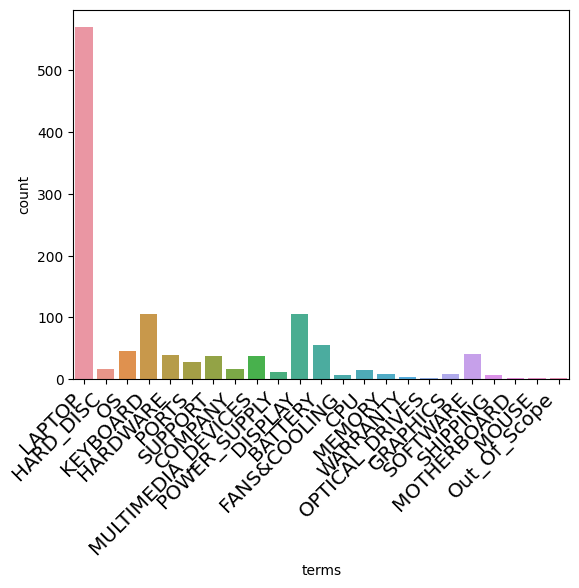

BATTERY               0.048234
COMPANY               0.014643
CPU                   0.012920
DISPLAY               0.091301
FANS&COOLING          0.005168
GRAPHICS              0.007752
HARDWARE              0.033592
HARD_DISC             0.013781
KEYBOARD              0.090439
LAPTOP                0.490956
MEMORY                0.006891
MOTHERBOARD           0.000861
MOUSE                 0.000861
MULTIMEDIA_DEVICES    0.031869
OPTICAL_DRIVES        0.001723
OS                    0.038760
Out_Of_Scope          0.000861
PORTS                 0.023256
POWER_SUPPLY          0.010336
SHIPPING              0.006029
SOFTWARE              0.034453
SUPPORT               0.031869
WARRANTY              0.003445
Name: terms, dtype: float64


In [36]:
percent = df_laptop_2['terms'].value_counts(normalize=True).sort_index()
sb.countplot(x=df_laptop_2['terms'], data = df_laptop_2)
# plt.show()
plt.xticks(rotation=45, 
           horizontalalignment='right',
           fontweight='light',
           fontsize='x-large')
plt.show()
print(percent)

In [25]:
fig = px.pie(df_terms, values='counts', names='terms', title='Terms Count')
fig.show()

In [26]:
df_terms.loc[df_terms['counts'] < 20, 'terms'] = 'Others' # Represent less frequently observerd terms
fig = px.pie(df_terms, values='counts', names='terms', title='Terms Count')
fig.show()

In [38]:
fig = px.bar(
    df_terms,
    x="terms",
    y="counts",
    color="pol",
    barmode="stack",
    color_discrete_map={
        "positive": "#52AC5E",
        "negative": "#e34a2d",
        "neutral": "gray",
    },
    title="Aspect Terms vs Polarity",
    template="plotly_white",
)

fig.show()

In [39]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_terms.loc[df_terms['pol']=="positive",'terms'], 
                     values=df_terms.loc[df_terms['pol']=="positive",'counts'], 
                     name="pos"), 1, 1) #scalegroup='on'
fig.add_trace(go.Pie(labels=df_terms.loc[df_terms['pol']=="neutral",'terms'], 
                     values=df_terms.loc[df_terms['pol']=="neutral",'counts'], 
                     name="neu"), 2, 1) #scalegroup='on'
fig.add_trace(go.Pie(labels=df_terms.loc[df_terms['pol']=="negative",'terms'], 
                     values=df_terms.loc[df_terms['pol']=="negative",'counts'], 
                     name="neg"), 1, 2) #scalegroup='on'
fig.add_trace(go.Pie(labels=df_terms['pol'], 
                     values=df_terms['counts'], 
                     name="pol"), 2, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")


fig.show()

In [40]:
stop_words.update(["LAPTOP"])

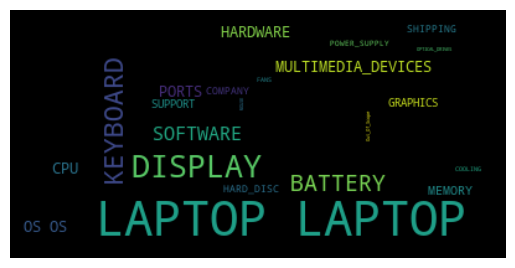

In [41]:
# Start with one review:
text = " ".join(term for term in df_laptop_2.loc[df_laptop_2['pol']=="positive", "terms"])

# Create and generate a word cloud image:
# wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
wordcloud = WordCloud(max_words=100).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

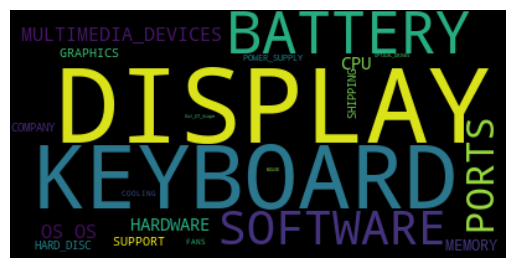

In [42]:
# Start with one review:
text = " ".join(term for term in df_laptop_2.loc[df_laptop_2['pol']=="positive", "terms"])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

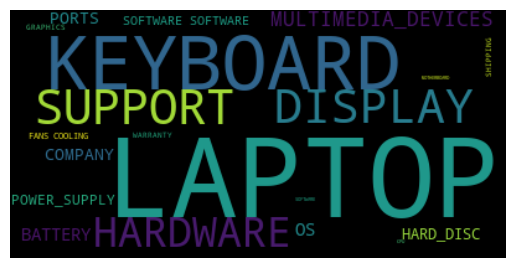

In [43]:
# Start with one review:
text = " ".join(term for term in df_laptop_2.loc[df_laptop_2['pol']=="negative", "terms"])

# Create and generate a word cloud image:
# wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
wordcloud = WordCloud(max_words=100).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

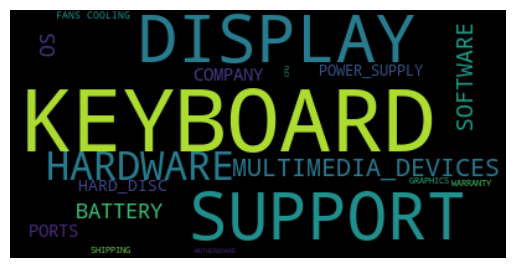

In [44]:
# Start with one review:
text = " ".join(term for term in df_laptop_2.loc[df_laptop_2['pol']=="negative", "terms"])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

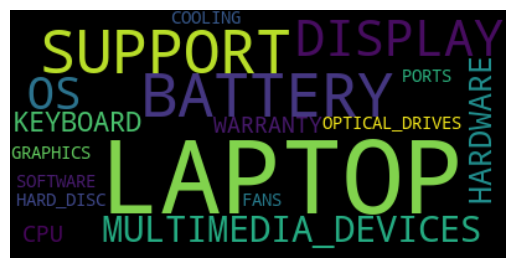

In [45]:
# Start with one review:
text = " ".join(term for term in df_laptop_2.loc[df_laptop_2['pol']=="neutral", "terms"])

# Create and generate a word cloud image:
# wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
wordcloud = WordCloud(max_words=100).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

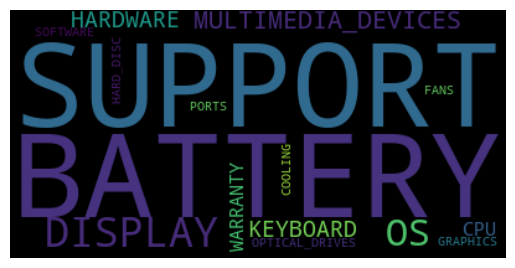

In [46]:
# Start with one review:
text = " ".join(term for term in df_laptop_2.loc[df_laptop_2['pol']=="neutral", "terms"])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, stopwords=stop_words).generate(text)
# max_font_size=50, background_color="white"

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Category vs Terms

In [47]:
fig = px.bar(
    df_terms_cat,
    x="cat",
    y="counts",
    color="terms",
    barmode="stack",
    color_discrete_map={
        "positive": "#52AC5E",
        "negative": "#e34a2d",
        "neutral": "gray",
    },
    title="Categories vs Aspect Terms",
    template="plotly_white",
)

fig.show()

In [48]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_terms_cat['cat'], 
                     values=df_terms_cat['counts'], 
                     name="category"), 1, 1)
fig.add_trace(go.Pie(labels=df_terms_cat['terms'], 
                     values=df_terms_cat['counts'], 
                     name="term"), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")


fig.show()

In [49]:
df_general = df_laptop_2.loc[df_laptop_2['cat'] == "GENERAL"]
pd.DataFrame(pd.value_counts(df_general.terms))

terms
LAPTOP                243
KEYBOARD               31
DISPLAY                31
SUPPORT                29
BATTERY                22
COMPANY                17
OS                     12
HARDWARE               10
SOFTWARE                8
PORTS                   8
MULTIMEDIA_DEVICES      7
GRAPHICS                6
WARRANTY                4
CPU                     4
HARD_DISC               4
MEMORY                  3
SHIPPING                3
FANS&COOLING            2
OPTICAL_DRIVES          2
POWER_SUPPLY            2
MOTHERBOARD             1

In [50]:
df_perf = df_laptop_2.loc[df_laptop_2['cat'] == "OPERATION_PERFORMANCE"]
pd.DataFrame(pd.value_counts(df_perf.terms))

terms
LAPTOP                119
OS                     27
MULTIMEDIA_DEVICES     25
DISPLAY                25
BATTERY                24
KEYBOARD               20
SOFTWARE               15
HARDWARE               14
CPU                    10
PORTS                   8
POWER_SUPPLY            7
HARD_DISC               6
SUPPORT                 3
SHIPPING                3
FANS&COOLING            2
MEMORY                  2
GRAPHICS                2

In [51]:
df_design = df_laptop_2.loc[df_laptop_2['cat'] == "DESIGN_FEATURES"]
pd.DataFrame(pd.value_counts(df_design.terms))

terms
LAPTOP                103
KEYBOARD               42
DISPLAY                31
SOFTWARE               10
HARDWARE                8
PORTS                   4
HARD_DISC               3
BATTERY                 2
OS                      2
MULTIMEDIA_DEVICES      2
GRAPHICS                1
POWER_SUPPLY            1
MEMORY                  1
Out_Of_Scope            1

In [52]:
df_quality = df_laptop_2.loc[df_laptop_2['cat'] == "QUALITY"]
pd.DataFrame(pd.value_counts(df_quality.terms))

terms
LAPTOP                 30
DISPLAY                17
BATTERY                 8
HARDWARE                6
PORTS                   5
SUPPORT                 5
MULTIMEDIA_DEVICES      3
SOFTWARE                3
KEYBOARD                3
HARD_DISC               3
POWER_SUPPLY            2
FANS&COOLING            2
SHIPPING                1
OS                      1
CPU                     1

In [53]:
df_price = df_laptop_2.loc[df_laptop_2['cat'] == "PRICE"]
pd.DataFrame(pd.value_counts(df_price.terms))

terms
LAPTOP     40

In [54]:
df_use = df_laptop_2.loc[df_laptop_2['cat'] == "USABILITY"]
pd.DataFrame(pd.value_counts(df_use.terms))

terms
LAPTOP       15
KEYBOARD      8
SOFTWARE      4
OS            3
MEMORY        2
DISPLAY       2
HARDWARE      1
PORTS         1
MOUSE         1

In [55]:
df_port = df_laptop_2.loc[df_laptop_2['cat'] == "PORTABILITY"]
pd.DataFrame(pd.value_counts(df_port.terms))

terms
LAPTOP     13

In [56]:
df_connect = df_laptop_2.loc[df_laptop_2['cat'] == "CONNECTIVITY"]
pd.DataFrame(pd.value_counts(df_connect.terms))

terms
LAPTOP      7
PORTS       1

In [57]:
df_misc = df_laptop_2.loc[df_laptop_2['cat'] == "MISCELLANEOUS"]
pd.DataFrame(pd.value_counts(df_misc.terms))

terms
KEYBOARD      1